# Análisis de la distribución de la popularidad (número de reseñas en el primer mes) #

El objetivo de este notebook es analizar la distribución del número de reseñas de los juegos en Steam

In [1]:
import pandas as pd
import json
import gzip
import os
import matplotlib.pyplot as plt
import plotly.express as px
from pathlib import Path

#### Creación del dataset:
Es necesario leer el json y crear un dataset a patir de la lista asociada a la clave `data`.

In [2]:
base_dir = Path().resolve().parents[1]
data_dir = base_dir / "data"
ruta = Path(data_dir / "info_steam_games_3.json.gz")

if not ruta.exists():
    raise FileNotFoundError(f"No se encuentra la ruta: {ruta}")

with gzip.open(data_dir / "info_steam_games_3.json.gz", "rt", encoding="UTF-8") as f:
    data = json.load(f)
    
df = pd.DataFrame(data['data'])

df

,id,appdetails,appreviewhistogram
0,1579610,"{'name': 'Ragdoll Funhouse', 'required_age': 0...",{}
1,1579650,"{'name': 'NULLPTR', 'required_age': 0, 'short_...",{}
2,1579660,"{'name': 'Wyvia', 'required_age': 0, 'short_de...","{'start_date': 1697587200, 'end_date': 1770768..."
3,1579680,"{'name': 'Host 714', 'required_age': 0, 'short...","{'start_date': 1624752000, 'end_date': 1690070..."
4,1579690,"{'name': 'Void Surfer', 'required_age': 0, 'sh...",{}
...,...,...,...
20650,2240790,"{'name': 'Sucker for Love: Date to Die For', '...","{'start_date': 1713830400, 'end_date': 1770940..."
20651,2240890,"{'name': 'the Dwarf', 'required_age': 0, 'shor...","{'start_date': 1713657600, 'end_date': 1760918..."
20652,2240900,"{'name': 'The King's Feast', 'required_age': 0...",{}
20653,2240910,"{'name': 'Silence In The Cabin', 'required_age...","{'start_date': 1671408000, 'end_date': 1766016..."


#### Modificación del dataframe:
Creación de columnas `free` que sirve para separar las distribuciones de los juegos gratuitos de los no gratuitos

In [3]:
df["name"] = df["appdetails"].apply(lambda x : x.get("name") if isinstance(x,dict) else None)
df["free"] = df["appdetails"].apply(lambda x: True if x.get("price_overview").get("initial") == 0 else False)
df.drop(columns=["appdetails"], inplace=True)

Creación de las columnas `recomendaciones_positivas` y `recomendaciones_negativas`.

In [4]:
df["recomendaciones_positivas"] = df["appreviewhistogram"].apply(lambda x: x.get("rollups").get("recommendations_up") if isinstance(x, dict) & isinstance(x.get("rollups"), dict) else None)
df["recomendaciones_negativas"] = df["appreviewhistogram"].apply(lambda x: x.get("rollups").get("recommendations_down") if isinstance(x, dict) & isinstance(x.get("rollups"), dict) else None)
df.dropna(inplace=True)

Se comprueba que no hay nulos en ninguna de las 2 columnas creadas

In [5]:
print(f"Nulos en columna recomendaciones positivas: {df["recomendaciones_negativas"].isna().sum()}, Nulos en columna recomendaciones negativas: {df["recomendaciones_positivas"].isna().sum()}")

Nulos en columna recomendaciones positivas: 0, Nulos en columna recomendaciones negativas: 0


Por último se ordena el dataset por el número de reseñas totales

In [6]:
df["total"] = df["recomendaciones_positivas"] + df["recomendaciones_negativas"]

df.sort_values(by="total",ascending=False, inplace=True)

df.head(n=20)

,id,appreviewhistogram,name,free,recomendaciones_positivas,recomendaciones_negativas,total
1517,1623730,"{'start_date': 1705622400, 'end_date': 1770854...",Palworld,False,146750.0,9677.0,156427.0
7470,1808500,"{'start_date': 1761782400, 'end_date': 1770940...",ARC Raiders,False,117122.0,14778.0,131900.0
762,1599340,"{'start_date': 1623369600, 'end_date': 1770854...",Lost Ark,True,87158.0,36593.0,123751.0
15318,2073850,"{'start_date': 1701993600, 'end_date': 1770940...",THE FINALS,True,72285.0,26290.0,98575.0
2142,1643320,"{'start_date': 1732060800, 'end_date': 1770854...",S.T.A.L.K.E.R. 2: Heart of Chornobyl,False,59400.0,11893.0,71293.0
15366,2074920,"{'start_date': 1719705600, 'end_date': 1770940...",The First Descendant,True,37528.0,32584.0,70112.0
17437,2139460,"{'start_date': 1720483200, 'end_date': 1770940...",Once Human,True,45104.0,18925.0,64029.0
4507,1716740,"{'start_date': 1693958400, 'end_date': 1770854...",Starfield,False,47326.0,15391.0,62717.0
10563,1903340,"{'start_date': 1745452800, 'end_date': 1770940...",Clair Obscur: Expedition 33,False,58872.0,3313.0,62185.0
6220,1771300,"{'start_date': 1738627200, 'end_date': 1770854...",Kingdom Come: Deliverance II,False,47858.0,4352.0,52210.0


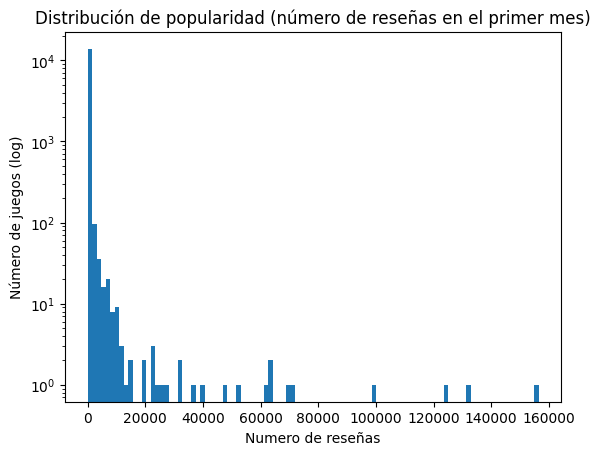

In [7]:
plt.hist(x=df["total"], bins=100)
plt.yscale("log")
plt.xlabel("Numero de reseñas")
plt.ylabel("Número de juegos (log)")
plt.title("Distribución de popularidad (número de reseñas en el primer mes)")
plt.show()

In [8]:
fig = px.histogram(df, x = "total",title="Distribución de popularidad (número de reseñas en el primer mes)",
                   labels={"x":"Número de reseñas", "y":"Número de juegos (log)"},nbins= 100,color = "free", opacity= 0.9,facet_col="free")
fig.update_yaxes(type="log")

fig.show()

In [9]:
print(f"Número de juegos con menos de 10 reseñas en el primer mes: {df[df["total"] < 50].shape[0]}")

Número de juegos con menos de 10 reseñas en el primer mes: 11425


Conclusiones:

Se aprecia que la distribución era la que esperábamos, una de cola larga con gran concentración de juegos alrededorde números de reseñas bajos y solo unos pocos con muchas reseñas. Además parece que la distribución se mantiene en las distintas categorías (los juegos gratuitos presentan la misma distribución que los no gratuitos).

Se puede comprobar si la distribución se mantiene a lo largo de distintas categorías diferentes. -> COMPLETAR